<a href="https://colab.research.google.com/github/chuducthang77/Machine-Learning-tutorials-and-notes/blob/main/1_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1: Gradient descent from scratch

Optimal x: 0.018139852799999988


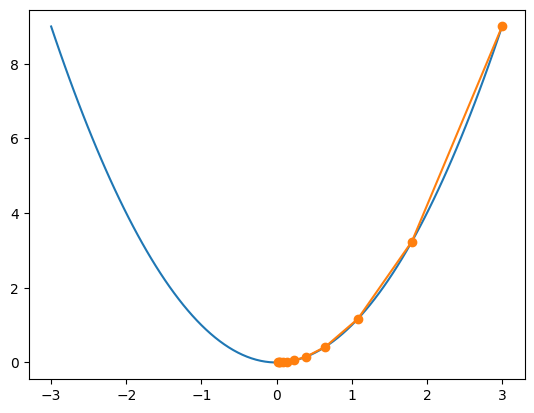

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Given function
def given_function(x):
    return x ** 2

# Define the gradient of the given function
def gradient(x):
    return 2 * x

lr = 0.2   # Step size for each iteration
num_iterations = 10  # Number of iterations

# Initial point to start gradient descent
x_initial = 3.0

# Gradient Descent Optimization
x = x_initial

# Save the result for plotting
x_values = [x_initial]
y_values = [given_function(x_initial)]

for i in range(num_iterations):
    # Calculate the gradient of the given function at the current point
    grad = gradient(x)

    # Update the current point using gradient descent
    x = x - lr * grad

    # Calculate and print the loss at each iteration (optional)
    value = given_function(x)
    x_values.append(x)
    y_values.append(value)

# Print the final result
print(f"Optimal x: {x}")

# Plotting the given function and the gradient descent
x_plot = np.linspace(-3, 3, 100)
y_plot = given_function(x_plot)

plt.plot(x_plot, y_plot)
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.show()

# Problem 2: Linear Regression on given dataset

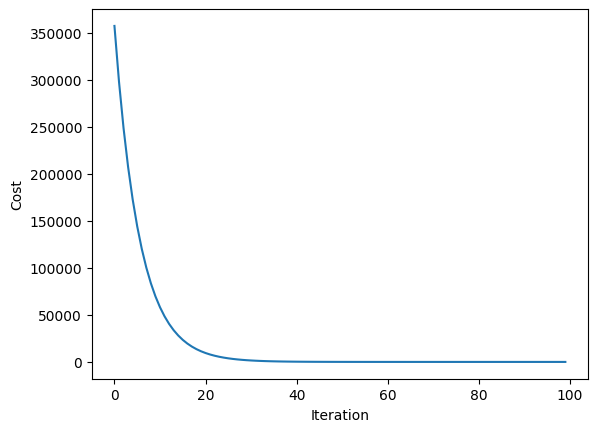

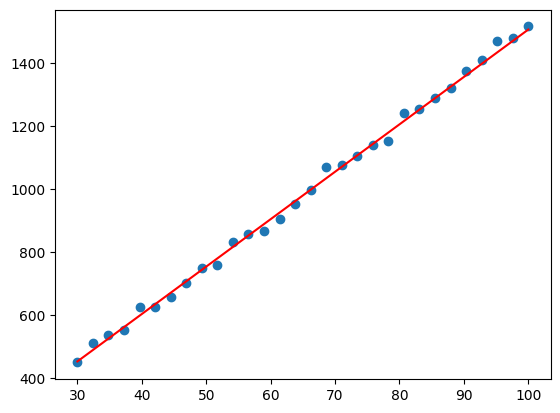

Mean squared error: 323.8267774798863
Root mean squared error: 17.99518762002459
Mean absolute error: 14.569392427253547
Mean absolute percentage error: 0.010097679660355284


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/NEU/HW/Solutions/data_linear.csv').values

# Specify the learning rate and number of iterations
lr = 0.000001
num_iterations = 100

# Modify data
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
x = np.hstack((np.ones((x.shape[0], 1)), x))

# Initialize the weights
train_size = int(0.8 * x.shape[0])
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

w = np.array([0., 1.]).reshape(-1, 1)
cost_arr = []

for i in range(num_iterations):
    # Calculate the predictions
    predictions = np.dot(x_train, w)

    # Calculate the error
    error = predictions - y_train

    # Calculate the cost (mean squared error)
    cost = 0.5 * np.sum(error ** 2) / train_size
    cost_arr.append(cost)

    # Update the weights using gradient descent
    gradient = np.dot(x_train.T, error)
    w -= lr * gradient

# Plot the cost history
plt.figure()
plt.plot(range(num_iterations), cost_arr)
plt.xlabel('Iteration')
plt.ylabel('Cost')


predict = np.dot(x, w)
plt.figure()
plt.scatter(x[:, 1], y)
plt.plot(x[:, 1], predict, 'r')
plt.show()

# Calculate the mean squared error on the test set
predictions = np.dot(x_test, w)
mse = np.mean((predictions - y_test) ** 2)
print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {np.sqrt(mse)}")
mae = np.mean(np.abs(predictions - y_test))
mape = np.mean(np.abs(predictions - y_test) / y_test)
print(f"Mean absolute error: {mae}")
print(f"Mean absolute percentage error: {mape}")